<a href="https://colab.research.google.com/github/Montse1708/Practica2_Random-Walks-II/blob/main/TI_1_Practica2_JessicaMontserratMoralesEnrique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Jessica Montserrat Morales Enrique

**e-mail:** jessica.morales5556@alumnos.udg.mx

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.
* Visualizar con **plotly**.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [ ]:
#Init variables
m = 3.0
Levy_exponent = [0.1, 0.5, 1.0, 1.9]
beta = 0

aux_domain = np.linspace(m-5, m+5, 400)

fig_Levy_pdf = go.Figure()

for i in range(len(Levy_exponent)):
  Levy_pdf = np.array([levy_stable.pdf(j, alpha=Levy_exponent[i], beta=beta, loc=m) for j in aux_domain])

  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y = Levy_pdf,
                                    marker = dict(size = 2),
                                    mode = 'lines',
                                    name = 'Levy_{}'.format(Levy_exponent[i]),
                                    showlegend = True))

  fig_Levy_pdf.update_layout(title_text = 'Lévy distribution - N Curvas',
                             autosize=False,
                             width= 800,
                             height = 800)

fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.

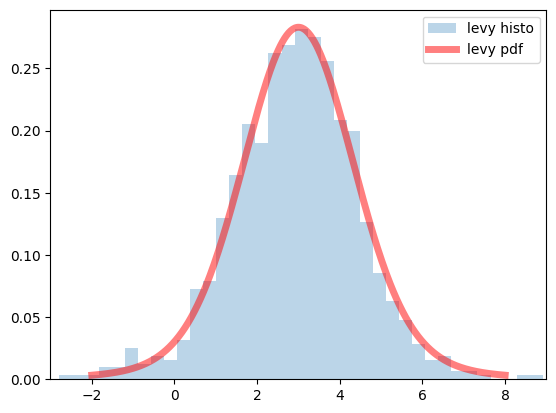

In [ ]:
# Init variables
m = 3.0
Levy_exponent = 1.8
beta = 0

aux_domain = np.linspace(m-5, m+5, 400)
Levy_pdf = np.array([levy_stable.pdf(i, alpha=Levy_exponent, beta=beta, loc=m) for i in aux_domain])
Levy_r = levy_stable.rvs(alpha=Levy_exponent, beta=beta, loc=m, size=1000)

plt.hist(Levy_r, bins=100, density=True, histtype='stepfilled', alpha=0.3, label='levy histo')
plt.plot(aux_domain, Levy_pdf, 'r-', lw=5, alpha=0.5, label='levy pdf')

#Desplegar leyendas
plt.legend(loc='best')

plt.xlim([-3, 9])

plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

In [ ]:
# Init variables
m = 3.0
Levy_exponent = 0.9
beta = 0
n_steps = 1000
s_pos = [0,0]

# Generar valores para el PDF de la distribución Lévy
aux_domain = np.linspace(m-5, m+5, 400)
Levy_pdf = np.array([levy_stable.pdf(i, alpha=Levy_exponent,beta=beta,loc=m)for i in aux_domain])

# Generar trayectoria Lévy
Levy_rvs = levy_stable.rvs(Levy_exponent, beta, loc=m, size=n_steps)

#Inicializar DataFrame para guardar la trayectoria
LF_2d_df = pd.DataFrame(columns=['x_pos', 'y_pos'])

#Agregar posición inicial al DataFrame
temp_df = pd.DataFrame([{'x_pos':s_pos[0], 'y_pos':s_pos[1]}])

#Concatenar
LF_2d_df = pd.concat([LF_2d_df, temp_df], ignore_index=True)

#Calcular y agregar posiciones sucesivas a la trayectoria
for i in range(n_steps-1):
  #Inicializar vector de velocidad
  velocity = Vec2d(Levy_rvs[i], 0)
  #Rotar el vector de velocidad
  velocity = velocity.rotated(Levy_rvs[i])

  #Calcular nueva posición y agregar al DataFrame
  temp_df = pd.DataFrame([{'x_pos': LF_2d_df.x_pos[i] + velocity.x, 'y_pos': LF_2d_df.y_pos[i] + velocity.y}])
  LF_2d_df = pd.concat([LF_2d_df, temp_df], ignore_index=True)

#Graficar y agregar trayectoria en 3D
fig_LF_2d = go.Figure()
fig_LF_2d.add_trace(go.Scatter3d(x = LF_2d_df.x_pos,
                                 y = LF_2d_df.y_pos,
                                 z = np.linspace(0, 1, n_steps),
                                 marker = dict(size = 2),
                                 line = dict(width = 2),
                                 mode = 'lines',
                                name = 'Levy Flight 3D',
                                 showlegend = True))

fig_LF_2d.update_layout(title_text='Levy flight in 3D',
                        autosize=False,
                        width = 900,
                        height = 700,
                        scene=dict(xaxis_title='x_pos (mm)',
                                    yaxis_title='y_pos (mm)'))

fig_LF_2d.show()


## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.

In [8]:
#Init variables
n_traj = 6
resolution = 100
s_pos = [0, 0]
speed = 5

#Cauchy distribution
aux_domain = np.linspace(0 , 2*np.pi, resolution)
#Coefiente de Cauchy para cada trayectoria
CRW_exponents = np.linspace(0.2, 0.5, n_traj)

#Hacer el ciclo de acuerdo al número de trayectorias
for i in range(n_traj):
  #Init velocity vector with Vec2d
  velocity = Vec2d(speed, 0)
  #Dirección de las trayectorias de manera aleatoria
  wrapcauchy_rvs = wrapcauchy.rvs(CRW_exponents[i], size=resolution)

  #Guardar trayectorias en Pandas Data Frame
  CRW_2d_df = pd.DataFrame(columns=['x_pos', 'y_pos'])
  temp_df = pd.DataFrame([{'x_pos': s_pos[0], 'y_pos': s_pos[1]}])

  #Concatenar
  CRW_2d_df = pd.concat([CRW_2d_df, temp_df], ignore_index=True)

  for j in range(resolution):
    #La rotación de cada trayectoria
    velocity = velocity.rotated(wrapcauchy_rvs[i])

